In [1]:
#Importing libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.shape

(3506, 9)

In [5]:
df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506 entries, 0 to 3505
Data columns (total 9 columns):
ID                 3506 non-null int64
CONSOLE            3506 non-null object
YEAR               3506 non-null int64
CATEGORY           3506 non-null object
PUBLISHER          3506 non-null object
RATING             3506 non-null object
CRITICS_POINTS     3506 non-null float64
USER_POINTS        3506 non-null float64
SalesInMillions    3506 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 246.6+ KB


In [7]:
df['ID'].nunique()

2654

In [8]:
df['CONSOLE'].unique()

array(['ds', 'wii', 'pc', 'ps2', 'ps3', 'psp', 'x', 'x360', 'psv', 'gba',
       'gc', 'ps', 'wiiu', 'xone', 'ps4', '3ds', 'dc'], dtype=object)

In [9]:
df['CATEGORY'].value_counts()

action          845
sports          464
shooter         441
role-playing    380
racing          296
misc            220
platform        218
fighting        187
simulation      150
strategy        132
adventure       114
puzzle           59
Name: CATEGORY, dtype: int64

In [10]:
df.describe()

,ID,YEAR,CRITICS_POINTS,USER_POINTS,SalesInMillions
count,3506.000000,3506.000000,3506.000000,3506.000000,3506.000000
mean,2282.233600,2008.990302,3.790831,0.405824,2.171021
std,1287.273422,4.304252,3.141781,0.455541,2.495396
min,1.000000,1997.000000,0.568966,0.000341,0.001524
25%,1220.250000,2006.000000,1.738095,0.065966,0.965679
50%,2262.500000,2009.000000,2.766667,0.233333,1.866140
75%,3404.750000,2012.000000,4.621528,0.598333,2.792029
max,4523.000000,2019.000000,23.250000,2.325000,84.226041


In [19]:
# Checking unique values of catogerical feature.
string = []
for i in df.columns:
    if df[i].dtypes == np.object:
        print(' %s contain %s unique catogeries.'% (i,df[i].nunique()))
        

 CONSOLE contain 17 unique catogeries.
 CATEGORY contain 12 unique catogeries.
 PUBLISHER contain 204 unique catogeries.
 RATING contain 6 unique catogeries.


### converting catogerical features.

In [22]:
df['RATING'].unique()

array(['E', 'E10+', 'M', 'T', 'K-A', 'RP'], dtype=object)

In [23]:
df['RATING'].value_counts()

T       1182
E       1061
M        749
E10+     511
RP         2
K-A        1
Name: RATING, dtype: int64

In [24]:
# (K-A) kids to adult belongs to same rating i.e 'E'(everyone)
df['RATING'] = df['RATING'].replace({'K-A':'E' , 'RP':'T'})

In [25]:
# Publisher contains more then 200 catogeries.
df['PUBLISHER'].nunique()

204

In [27]:
# This one-hot encoding is done by KDD 2009 cup winning team.

top_10 = [i for i in df['PUBLISHER'].value_counts().sort_values(ascending=False).head(10).index]
top_10

['Electronic Arts',
 'Activision',
 'Ubisoft',
 'Nintendo',
 'Thq',
 'Sony Computer Entertainment',
 'Take-Two Interactive',
 'Sega',
 'Konami Digital Entertainment',
 'Namco Bandai Games']

In [28]:
for label in top_10:
    df[label] = np.where(df['PUBLISHER'] == label, 1,0)
    
df[['PUBLISHER']+top_10].head(10)

,PUBLISHER,Electronic Arts,Activision,Ubisoft,Nintendo,Thq,Sony Computer Entertainment,Take-Two Interactive,Sega,Konami Digital Entertainment,Namco Bandai Games
0,Nintendo,0,0,0,1,0,0,0,0,0,0
1,Konami Digital Entertainment,0,0,0,0,0,0,0,0,1,0
2,Activision,0,1,0,0,0,0,0,0,0,0
3,Electronic Arts,1,0,0,0,0,0,0,0,0,0
4,Activision,0,1,0,0,0,0,0,0,0,0
5,Sony Computer Entertainment,0,0,0,0,0,1,0,0,0,0
6,Idea Factory,0,0,0,0,0,0,0,0,0,0
7,Atari,0,0,0,0,0,0,0,0,0,0
8,Empire Interactive,0,0,0,0,0,0,0,0,0,0
9,Sony Computer Entertainment,0,0,0,0,0,1,0,0,0,0


In [29]:
df.drop('PUBLISHER',axis=1,inplace = True)

In [34]:
df.shape

(3506, 18)

In [35]:
# converting console feature by label Encoder.
le = LabelEncoder()
df['CONSOLE'] = le.fit_transform(df['CONSOLE'])

In [37]:
# converting rating and category by get_dummies.
df = pd.get_dummies(data = df,columns=['RATING','CATEGORY'],drop_first = True)

In [38]:
df.head()

,ID,CONSOLE,YEAR,CRITICS_POINTS,USER_POINTS,SalesInMillions,Electronic Arts,Activision,Ubisoft,Nintendo,...,CATEGORY_fighting,CATEGORY_misc,CATEGORY_platform,CATEGORY_puzzle,CATEGORY_racing,CATEGORY_role-playing,CATEGORY_shooter,CATEGORY_simulation,CATEGORY_sports,CATEGORY_strategy
0,2860,2,2008,2.833333,0.303704,1.779257,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,731,12,2012,13.200000,1.640000,0.215050,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,495,5,2019,4.562500,0.006410,0.534402,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2641,7,2002,4.181818,0.326923,1.383964,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,811,8,2013,2.259259,0.032579,0.082671,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.shape

(3506, 30)

In [40]:
# Creating 2 new columns.
df['no_year'] = 2020 - df['YEAR'] 
df['total_points'] = df['USER_POINTS']*df['CRITICS_POINTS']


In [41]:
df.drop('YEAR',axis=1,inplace=True)

In [42]:
df.head()

,ID,CONSOLE,CRITICS_POINTS,USER_POINTS,SalesInMillions,Electronic Arts,Activision,Ubisoft,Nintendo,Thq,...,CATEGORY_platform,CATEGORY_puzzle,CATEGORY_racing,CATEGORY_role-playing,CATEGORY_shooter,CATEGORY_simulation,CATEGORY_sports,CATEGORY_strategy,no_year,total_points
0,2860,2,2.833333,0.303704,1.779257,0,0,0,1,0,...,0,0,0,1,0,0,0,0,12,0.860494
1,731,12,13.200000,1.640000,0.215050,0,0,0,0,0,...,0,0,0,0,0,1,0,0,8,21.648000
2,495,5,4.562500,0.006410,0.534402,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0.029247
3,2641,7,4.181818,0.326923,1.383964,1,0,0,0,0,...,0,0,0,0,0,0,1,0,18,1.367133
4,811,8,2.259259,0.032579,0.082671,0,1,0,0,0,...,0,0,0,0,0,0,0,0,7,0.073605


In [45]:
df.columns

Index(['ID', 'CONSOLE', 'CRITICS_POINTS', 'USER_POINTS', 'SalesInMillions',
       'Electronic_Arts', 'Activision', 'Ubisoft', 'Nintendo', 'Thq',
       'Sony_Computer_Entertainment', 'Take_Two_Interactive', 'Sega',
       'Konami_Digital_Entertainment', 'Namco_Bandai_Games', 'RATING_E10+',
       'RATING_M', 'RATING_T', 'CATEGORY_adventure', 'CATEGORY_fighting',
       'CATEGORY_misc', 'CATEGORY_platform', 'CATEGORY_puzzle',
       'CATEGORY_racing', 'CATEGORY_role_playing', 'CATEGORY_shooter',
       'CATEGORY_simulation', 'CATEGORY_sports', 'CATEGORY_strategy',
       'no_year', 'total_points'],
      dtype='object')

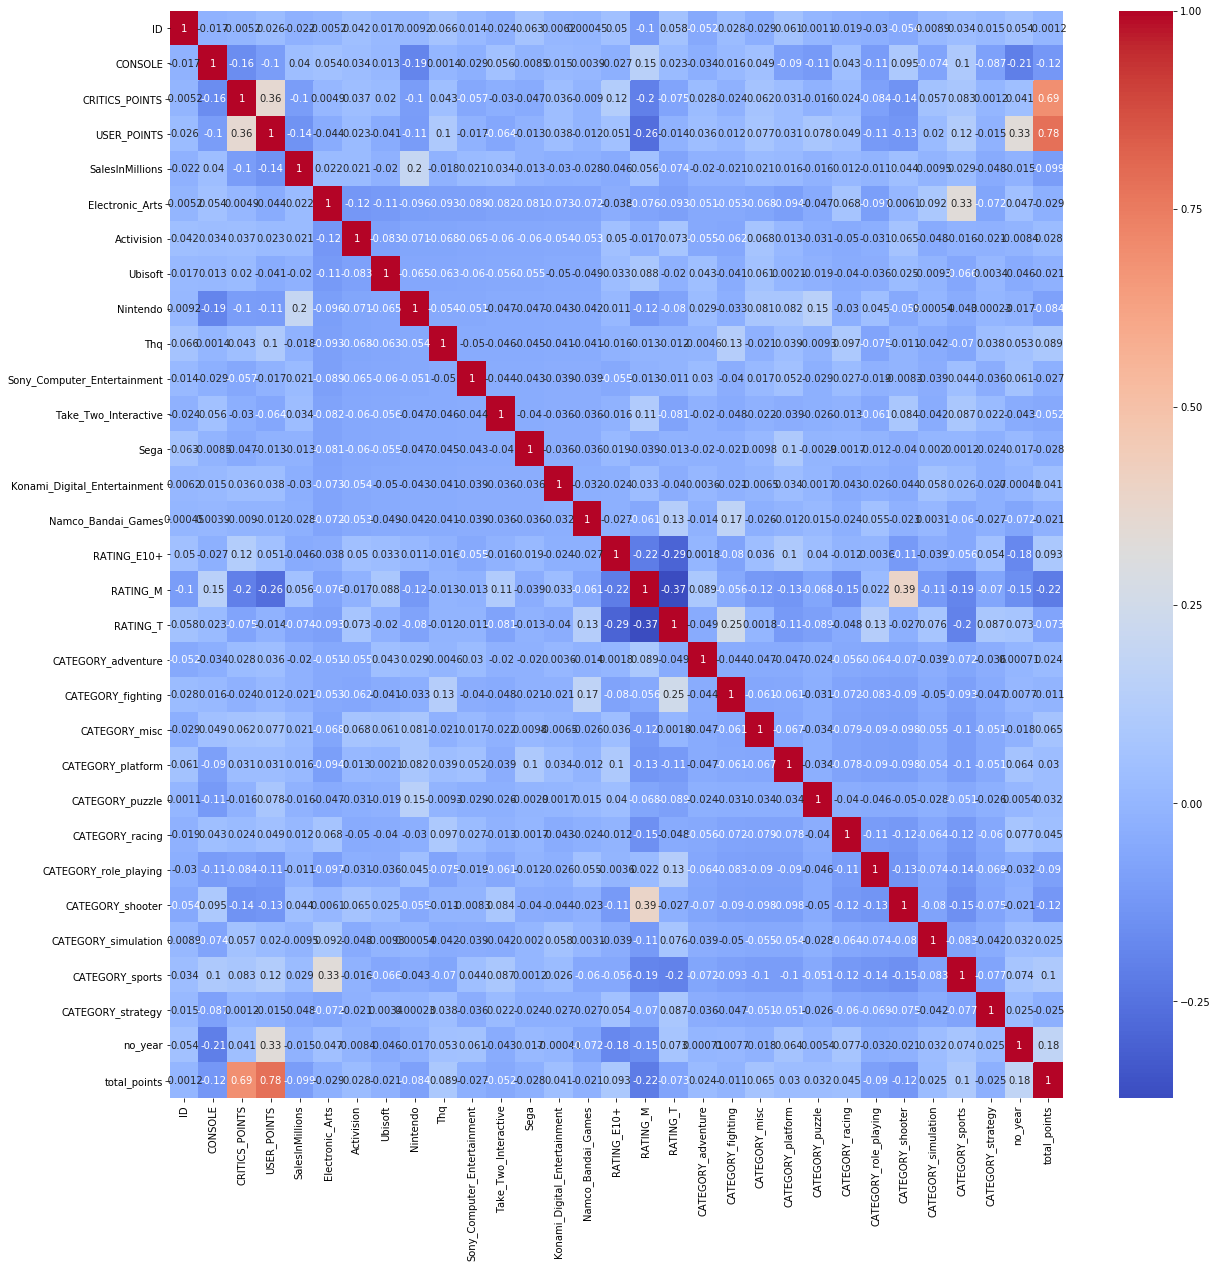

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [47]:
x = df.drop('SalesInMillions',axis=1)
y = df['SalesInMillions']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [49]:
x.head()

,ID,CONSOLE,CRITICS_POINTS,USER_POINTS,Electronic_Arts,Activision,Ubisoft,Nintendo,Thq,Sony_Computer_Entertainment,...,CATEGORY_platform,CATEGORY_puzzle,CATEGORY_racing,CATEGORY_role_playing,CATEGORY_shooter,CATEGORY_simulation,CATEGORY_sports,CATEGORY_strategy,no_year,total_points
0,2860,2,2.833333,0.303704,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,12,0.860494
1,731,12,13.200000,1.640000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,8,21.648000
2,495,5,4.562500,0.006410,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.029247
3,2641,7,4.181818,0.326923,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,18,1.367133
4,811,8,2.259259,0.032579,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0.073605


In [50]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.05395842231110748

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x_train, y_train, cv=cv)

array([0.01942629, 0.08008965, 0.05013121])

In [53]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [54]:
print(model.feature_importances_)

[0.14597076 0.10038768 0.07593177 0.23104595 0.00478177 0.01365892
 0.00602519 0.03869162 0.00204683 0.00441981 0.00832611 0.0032286
 0.00221212 0.00269758 0.01387721 0.00660503 0.01054265 0.00259291
 0.00586933 0.00433247 0.00946885 0.00110614 0.02625858 0.0085163
 0.01926764 0.00630139 0.04542321 0.00307223 0.09756382 0.09977753]


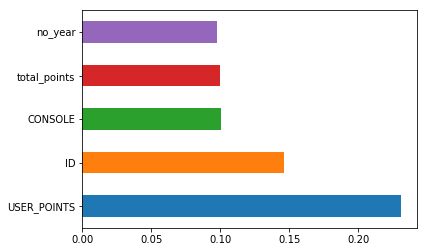

In [55]:
feature_imp = pd.Series(model.feature_importances_, index=x.columns)
feature_imp.nlargest(5).plot.barh()
plt.show()

In [56]:
# importing model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [57]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [58]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [59]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()

In [60]:
rf_model  = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=5, cv=5, verbose=3, scoring='neg_mean_squared_error',random_state=
                              42, n_jobs=1)
                  

In [61]:
rf_model.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-3.7748008258920067, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-2.903283241376478, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-4.866819250044427, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-1.9473326952978054, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-4.57138807082472, total=   2.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, score=-3.6473932743988904, total=   4.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_sa

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=3)

In [62]:
y_pred = rf_model.predict(x_test)

In [63]:
rf_model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=1100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [64]:
rf_model.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

C:\Users\91955\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


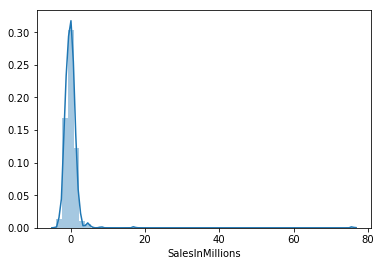

In [65]:
sns.distplot(y_test-y_pred)

In [66]:
import pickle
file = open('random_forest_model2.pkl','wb')
pickle.dump(rf_model,file)